In [1]:
import tensorflow as tf

In [2]:
data_dir = "/content/drive/MyDrive/fire_dataset"

In [3]:
img_size = (128, 128)
batch_size = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

Found 1005 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['fire_images', 'non_fire_images']


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

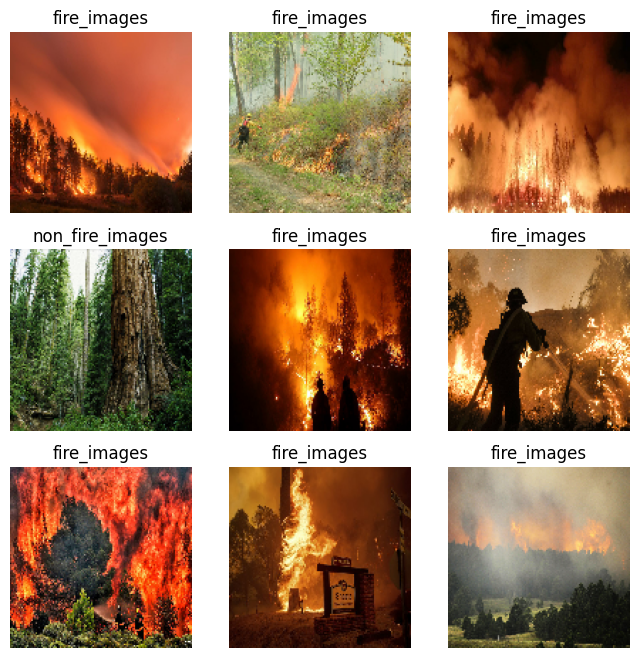

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
)


Found 1005 images belonging to 2 classes.


In [11]:
model.fit(train_generator, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8098 - loss: 0.3893
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9580 - loss: 0.1483
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9511 - loss: 0.1436
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9595 - loss: 0.1452
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9508 - loss: 0.1548
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9548 - loss: 0.1358
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9736 - loss: 0.0916
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9468 - loss: 0.1216
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9472 - loss: 0.1333
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9632 - loss: 0.1007


Saving download.jpg to download.jpg


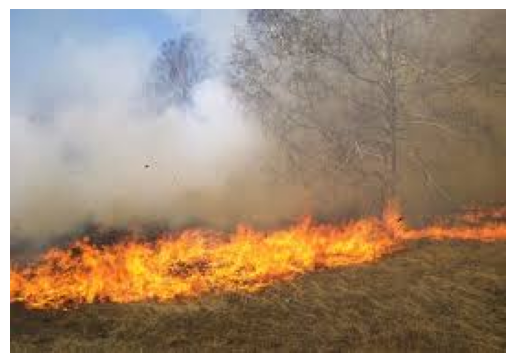

In [12]:
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt


uploaded = files.upload()


image_name = list(uploaded.keys())[0]


image = Image.open(io.BytesIO(uploaded[image_name]))


image.show()


plt.imshow(image)
plt.axis('off')
plt.show()


Saving download.jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


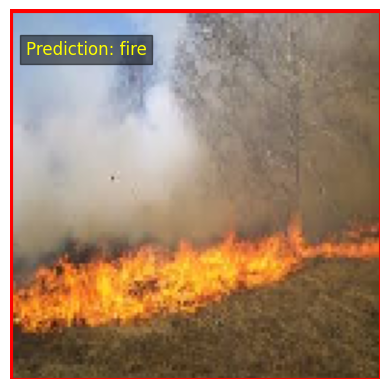

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import files


uploaded = files.upload()
img_path = list(uploaded.keys())[0]


img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array_exp)
class_idx = np.argmax(pred)  # 0 = fire, 1 = non_fire
label = "fire" if class_idx == 0 else "non_fire"


fig, ax = plt.subplots()

ax.imshow(img_array)

rect = patches.Rectangle((0,0), img_array.shape[1], img_array.shape[0],
                         linewidth=3, edgecolor='red', facecolor='none')
ax.add_patch(rect)

ax.text(5, 15, f'Prediction: {label}', color='yellow', fontsize=12,
        bbox=dict(facecolor='black', alpha=0.5))
plt.axis('off')
plt.show()


In [68]:

print(train_generator.class_indices)


{'fire_images': 0, 'non_fire_images': 1}


In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,696 (37.82 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,798 (25.21 MB)

In [71]:

model.save('/content/fire_model.h5')

In [72]:
from google.colab import files

files.download('/content/fire_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>